#### Testing the validity of two datasets through comparison. Datasets are from the same source with 10 years between collection.

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

#### Separate files being loaded independantly

In [28]:
csv_one = pd.read_csv("population_by_zip_2000.csv")

In [29]:
csv_two = pd.read_csv("population_by_zip_2010.csv")

#### previewing headers to verify files do not mirror each other

In [30]:
csv_one.head()

,minimum_age,maximum_age,gender,population,zipcode,geo_id
0,10.0,14.0,female,75,39769,8600000US39769
1,85.0,NaN,female,130,44047,8600000US44047
2,30.0,34.0,female,11,42436,8600000US42436
3,22.0,24.0,male,22,99685,8600000US99685
4,67.0,69.0,male,69,04239,8600000US04239


In [31]:
csv_two.head()

,population,minimum_age,maximum_age,gender,zipcode,geo_id
0,50,30.0,34.0,female,61747,8600000US61747
1,5,85.0,NaN,male,64120,8600000US64120
2,1389,30.0,34.0,male,95117,8600000US95117
3,231,60.0,61.0,female,74074,8600000US74074
4,56,0.0,4.0,female,58042,8600000US58042


#### Joining the two files into one before performing calculations

In [32]:
merged_data = pd.merge(csv_one, csv_two, on='geo_id', how='right')
merged_data.head()


,minimum_age_x,maximum_age_x,gender_x,population_x,zipcode_x,geo_id,population_y,minimum_age_y,maximum_age_y,gender_y,zipcode_y
0,50.0,54.0,male,51.0,61747,8600000US61747,50,30.0,34.0,female,61747
1,62.0,64.0,female,17.0,61747,8600000US61747,50,30.0,34.0,female,61747
2,NaN,NaN,NaN,1472.0,61747,8600000US61747,50,30.0,34.0,female,61747
3,50.0,54.0,female,45.0,61747,8600000US61747,50,30.0,34.0,female,61747
4,10.0,14.0,male,59.0,61747,8600000US61747,50,30.0,34.0,female,61747


#### organizing columns for visual aesthetics

In [33]:
merged_data = merged_data.reindex(sorted(merged_data.columns), axis=1)
merged_data.head()

,gender_x,gender_y,geo_id,maximum_age_x,maximum_age_y,minimum_age_x,minimum_age_y,population_x,population_y,zipcode_x,zipcode_y
0,male,female,8600000US61747,54.0,34.0,50.0,30.0,51.0,50,61747,61747
1,female,female,8600000US61747,64.0,34.0,62.0,30.0,17.0,50,61747,61747
2,NaN,female,8600000US61747,NaN,34.0,NaN,30.0,1472.0,50,61747,61747
3,female,female,8600000US61747,54.0,34.0,50.0,30.0,45.0,50,61747,61747
4,male,female,8600000US61747,14.0,34.0,10.0,30.0,59.0,50,61747,61747


#### clean null values from population columns

In [49]:
merged_data['population_x'] = merged_data['population_x'].fillna(0)
merged_data['population_y'] = merged_data['population_y'].fillna(0)

#### sum population totals and assign to variable

In [50]:

population_x_total = sum(merged_data.population_x)
print(population_x_total)

population_y_total = sum(merged_data.population_y)
print(population_y_total)

41833409205.0
44785690977


#### Display visual comparison of population change from 2000-2010

<AxesSubplot: >

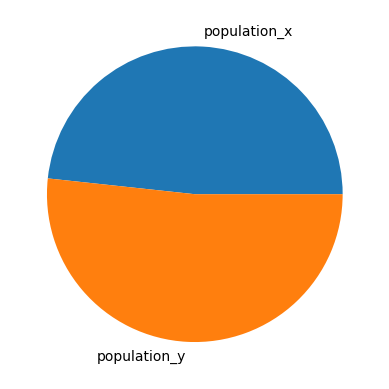

In [35]:
merged_data[merged_data.columns[7:9]].sum().plot.pie()

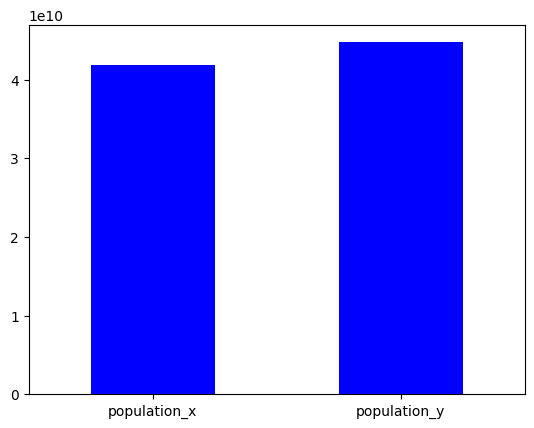

In [36]:
merged_data[merged_data.columns[7:9]].sum().plot.bar(rot=0, color='Blue')
plt.tight_layout
plt.show()

#### exploring average min/max ages

In [37]:
avg_max_age_x = merged_data["maximum_age_x"].mean()
print(avg_max_age_x)

avg_max_age_y = merged_data["maximum_age_y"].mean()
print(avg_max_age_y)

avg_min_age_x = merged_data["minimum_age_x"].mean()
print(avg_min_age_x)

avg_min_age_y = merged_data["minimum_age_y"].mean()
print(avg_min_age_y)

42.40909090909091
42.40909090909091
41.52173913043478
41.52173913043478


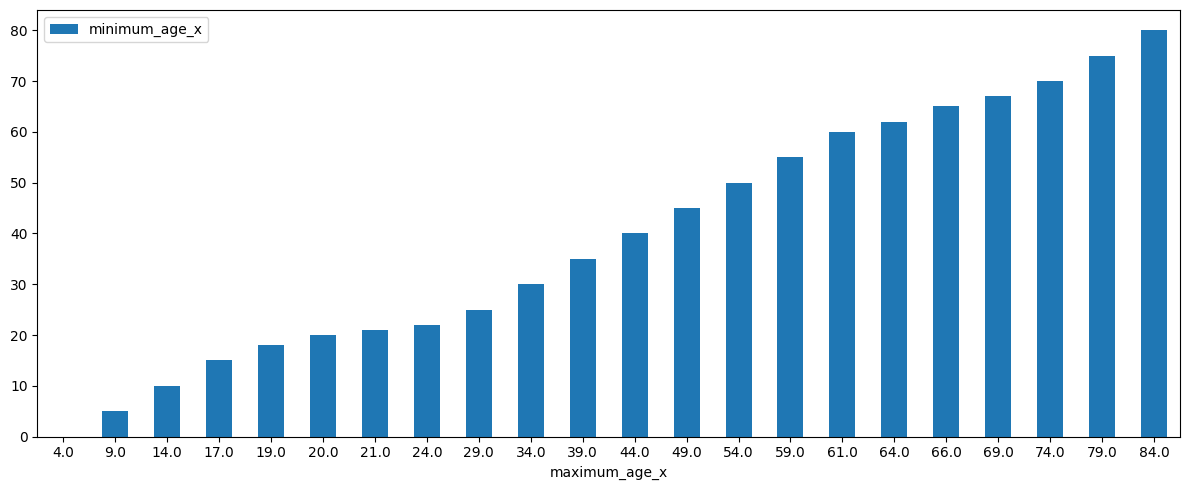

In [38]:

mean_age = merged_data.groupby('maximum_age_x')[['minimum_age_x']].mean().sort_values('minimum_age_x')


ax = mean_age.plot.bar(rot=0, figsize=(12, 5))
ax.ticklabel_format(axis='y', style='plain')
plt.tight_layout()
plt.show()


#### Establish gender ratio per dataset. Values reported are which gender is most prevalent by reporting region.

In [39]:
male_x = merged_data["gender_x"].value_counts()["male"]
female_x = merged_data["gender_x"].value_counts()["female"]
print("Gender X counts male : ", male_x, ", female : ", female_x)

male_y = merged_data["gender_y"].value_counts()["male"]
female_y = merged_data["gender_y"].value_counts()["female"]
print("Gender Y counts male : ", male_y, ", female : ", female_y)

Gender X counts male :  36899352 , female :  36899352
Gender Y counts male :  36941160 , female :  36941160


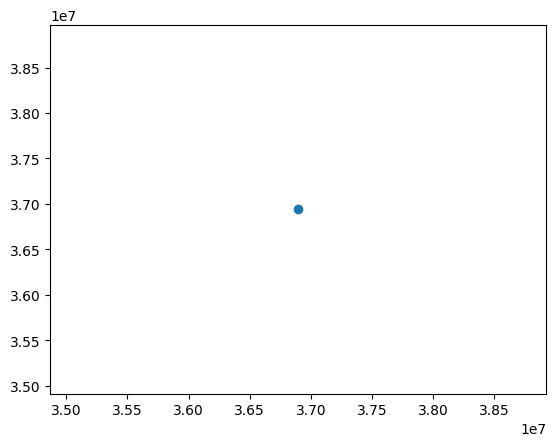

In [40]:
plt.scatter(x = male_x, y = male_y),
plt.show()

#### verifying the gender result counts are accurate as this seems odd for them to be identical

In [41]:
print(merged_data['gender_x'].value_counts()["male"])
print(merged_data['gender_x'].value_counts()["female"])

36899352
36899352


In [42]:
count_male = merged_data['gender_x']=="male"
count_male.sum()
count_female = merged_data['gender_x']=="female"
count_female.sum()

36899352

<AxesSubplot: >

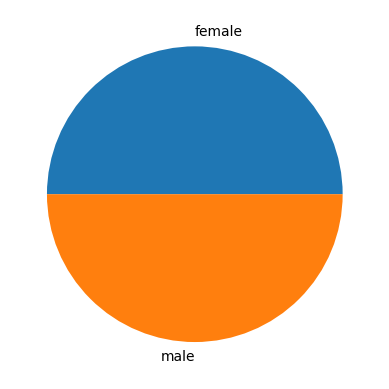

In [43]:
merged_data.groupby(['gender_x']).size().plot.pie()


<AxesSubplot: >

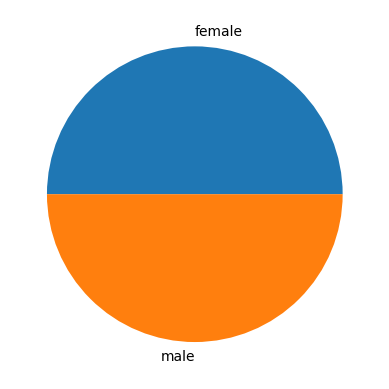

In [44]:
merged_data.groupby(['gender_y']).size().plot.pie()

#### Conclusion based on findings. There is a significant probability that the second dataset is a copy of the first with added/updated values in the "population" columns only.